In [38]:
#Spotify Tracks Data Anaylsis
import pandas as pd

# Spotify Data Analysis

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import sklearn
from sklearn import preprocessing, model_selection, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder , MinMaxScaler , OneHotEncoder 
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier , RandomForestRegressor , GradientBoostingRegressor, AdaBoostRegressor , AdaBoostClassifier
from sklearn.linear_model import LogisticRegression , LinearRegression , Lasso , Ridge , ElasticNet , SGDRegressor , SGDClassifier , LogisticRegressionCV , RidgeCV , LassoCV
from sklearn.tree import DecisionTreeClassifier , DecisionTreeRegressor
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier , KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error , accuracy_score , roc_auc_score , f1_score , average_precision_score 

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline, make_pipeline 
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBRegressor , XGBClassifier


import warnings
warnings.filterwarnings("ignore")

In [40]:
df = pd.read_csv('dataset/spotifydata.csv' , index_col=0)
df.head()

track_id                 artists  \
0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   
3  Can't Help Falling In Love          71       201933     False   
4                     Hold On          82       198853     False   

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.676  0.4610    1    -6.746     0       0.1430        0.0322   
1         0.420  0.1660    1   -17.235     1       0.0763        0.9240   
2         0.438  0.3590    0    -9.734     1       0.0557        0.2100   
3         0.266  0.0596    0   -18.515     1       0.0363        0.9050   
4         0.618  0.4430    2    -9.681     1       0.0526        0.4690   

   instrumentalness  liveness  valence    tempo  time_signature track_genre  
0          0.000001    0.3580    0.715   87.917               4    acoustic  
1          0.000006    0.1010    0.267   77.489               4    acoustic  
2          0.000000    0.1170    0.120   76.332               4    acoustic  
3          0.000071    0.1320    0.143  181.740               3    acoustic  
4          0.000000    0.0829    0.167  119.949               4    acoustic

In [41]:
df.info()
df.count()



<class 'pandas.core.frame.DataFrame'>
Index: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           114000 

track_id            114000
artists             113999
album_name          113999
track_name          113999
popularity          114000
duration_ms         114000
explicit            114000
danceability        114000
energy              114000
key                 114000
loudness            114000
mode                114000
speechiness         114000
acousticness        114000
instrumentalness    114000
liveness            114000
valence             114000
tempo               114000
time_signature      114000
track_genre         114000
dtype: int64

In [42]:
df.isnull().sum()


track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [43]:
duplicates_rows = df[df.duplicated()]
duplicates_rows
df = df.drop_duplicates()
df.count()

track_id            113550
artists             113549
album_name          113549
track_name          113549
popularity          113550
duration_ms         113550
explicit            113550
danceability        113550
energy              113550
key                 113550
loudness            113550
mode                113550
speechiness         113550
acousticness        113550
instrumentalness    113550
liveness            113550
valence             113550
tempo               113550
time_signature      113550
track_genre         113550
dtype: int64

In [44]:
df = df.dropna()
df.count()

track_id            113549
artists             113549
album_name          113549
track_name          113549
popularity          113549
duration_ms         113549
explicit            113549
danceability        113549
energy              113549
key                 113549
loudness            113549
mode                113549
speechiness         113549
acousticness        113549
instrumentalness    113549
liveness            113549
valence             113549
tempo               113549
time_signature      113549
track_genre         113549
dtype: int64

In [45]:
df.describe()

popularity   duration_ms   danceability         energy  \
count  113549.000000  1.135490e+05  113549.000000  113549.000000   
mean       33.324433  2.280814e+05       0.567031       0.642091   
std        22.283855  1.064131e+05       0.173409       0.251053   
min         0.000000  8.586000e+03       0.000000       0.000000   
25%        17.000000  1.741840e+05       0.456000       0.473000   
50%        35.000000  2.130000e+05       0.580000       0.685000   
75%        50.000000  2.615880e+05       0.695000       0.854000   
max       100.000000  5.237295e+06       0.985000       1.000000   

                 key       loudness           mode    speechiness  \
count  113549.000000  113549.000000  113549.000000  113549.000000   
mean        5.309452      -8.243408       0.637866       0.084674   
std         3.560147       5.011422       0.480620       0.105762   
min         0.000000     -49.531000       0.000000       0.000000   
25%         2.000000      -9.998000       0.000000       0.035900   
50%         5.000000      -6.997000       1.000000       0.048900   
75%         8.000000      -5.001000       1.000000       0.084500   
max        11.000000       4.532000       1.000000       0.965000   

        acousticness  instrumentalness       liveness        valence  \
count  113549.000000     113549.000000  113549.000000  113549.000000   
mean        0.314064          0.155703       0.213613       0.474205   
std         0.331906          0.309217       0.190462       0.259204   
min         0.000000          0.000000       0.000000       0.000000   
25%         0.016800          0.000000       0.098000       0.260000   
50%         0.168000          0.000041       0.132000       0.464000   
75%         0.596000          0.048700       0.273000       0.683000   
max         0.996000          1.000000       1.000000       0.995000   

               tempo  time_signature  
count  113549.000000   113549.000000  
mean      122.175745        3.904218  
std        29.972954        0.432117  
min         0.000000        0.000000  
25%        99.296000        4.000000  
50%       122.020000        4.000000  
75%       140.074000        4.000000  
max       243.372000        5.000000

In [46]:
df_timesignature = df['time_signature'].value_counts()
df_timesignature

time_signature
4    101486
3      9128
5      1805
1       967
0       163
Name: count, dtype: int64

## 1. Distribution Analysis:
- What's the distribution of popularity scores across different genres?

Index(['acoustic', 'emo', 'rock-n-roll', 'reggaeton', 'disco'], dtype='object', name='track_genre')


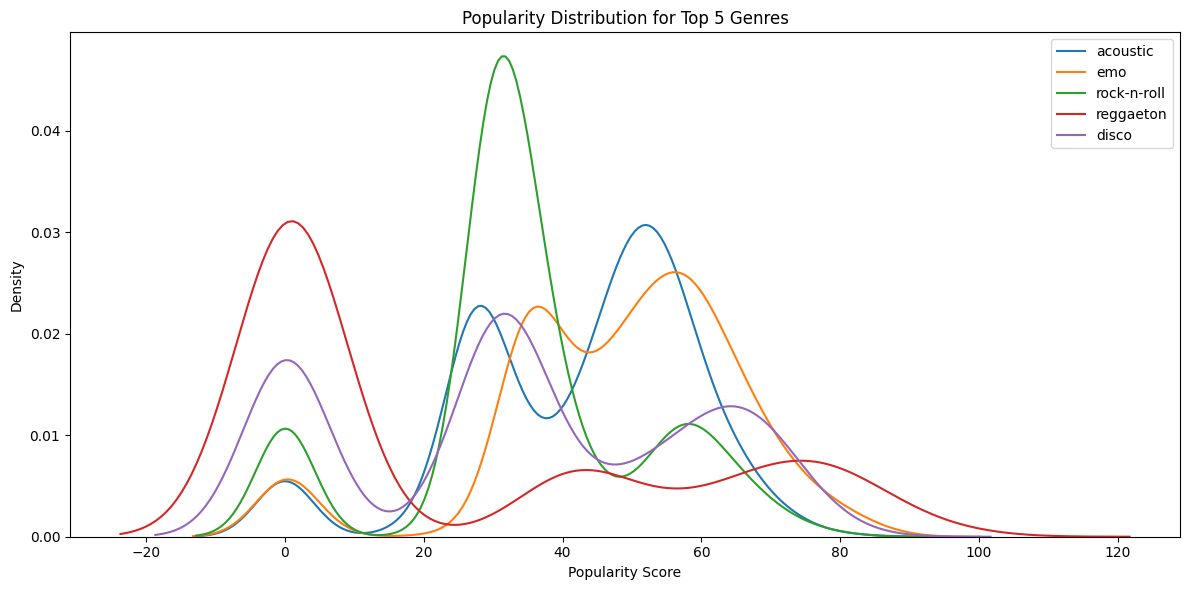

In [47]:
top_5_genres = df['track_genre'].value_counts().nlargest(5).index
print(top_5_genres)

plt.figure(figsize=(12, 6))
for genre in top_5_genres:
    sns.kdeplot(data=df[df['track_genre'] == genre]['popularity'], 
                label=genre)
plt.title('Popularity Distribution for Top 5 Genres')
plt.xlabel('Popularity Score')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()


Answer: Rock and Roll has the highest densitywith poularity ranging in values from 20 to 40.

- How does track duration vary across different genres?

In [48]:
df['duration_min'] = df['duration_ms'] / (1000 * 60)

In [49]:
df_top_5_genres = df[df['track_genre'].isin(top_5_genres)]
df_top_5_genres.count()

track_id            5000
artists             5000
album_name          5000
track_name          5000
popularity          5000
duration_ms         5000
explicit            5000
danceability        5000
energy              5000
key                 5000
loudness            5000
mode                5000
speechiness         5000
acousticness        5000
instrumentalness    5000
liveness            5000
valence             5000
tempo               5000
time_signature      5000
track_genre         5000
duration_min        5000
dtype: int64

- How does track duration vary across different genres?

Index(['acoustic', 'emo', 'rock-n-roll', 'reggaeton', 'disco', 'r-n-b',
       'punk-rock', 'pagode', 'electronic', 'mpb'],
      dtype='object', name='track_genre')


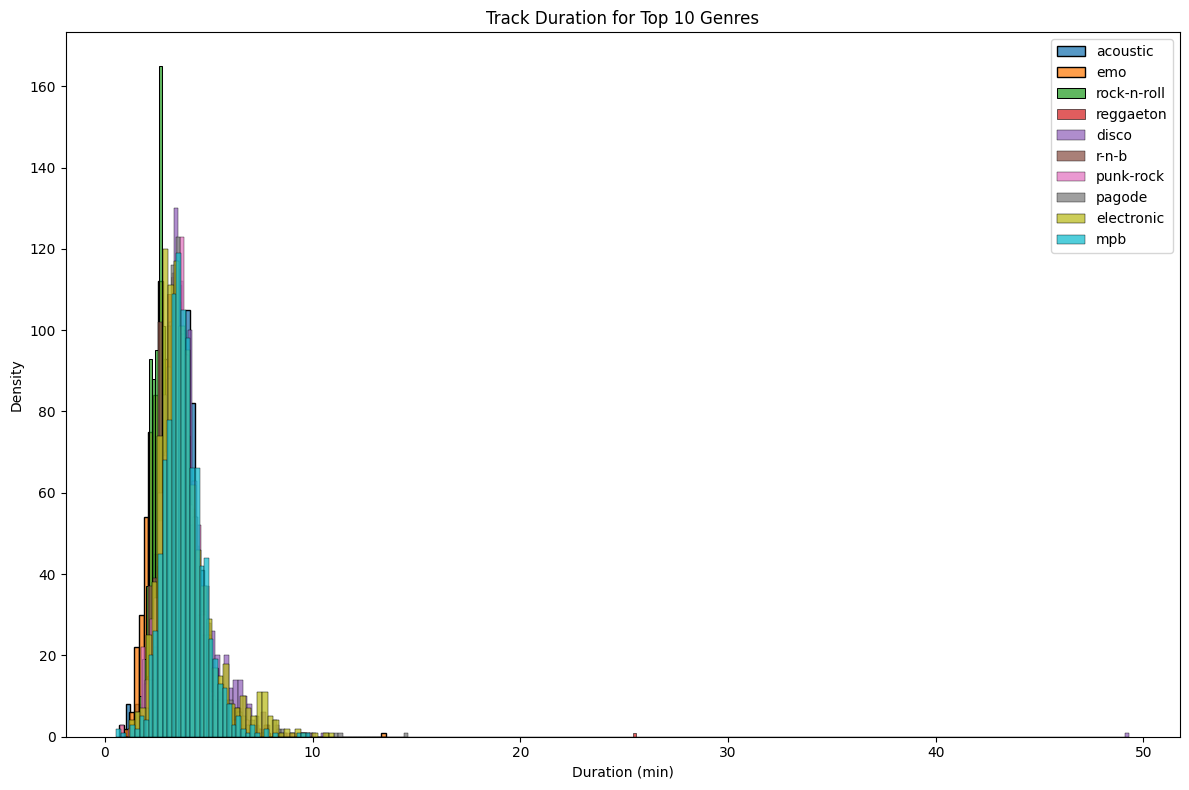

In [50]:
top_10_genres = df['track_genre'].value_counts().nlargest(10).index
print(top_10_genres)

plt.figure(figsize=(12, 8))
for genre in top_10_genres:
    sns.histplot(data=df[df['track_genre'] == genre]['duration_min'], 
                label=genre)
plt.title('Track Duration for Top 10 Genres')
plt.xlabel('Duration (min)')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()


In [51]:
highest_track_duration = df['duration_min'].sort_values(ascending=False).keys()
print('Top 10 longest tracks:')
song = df.loc[highest_track_duration].head(10)
song

Top 10 longest tracks:


track_id            artists  \
73617   3Cnz3Bu9Wcw8p3kiBTXTxp         Tale Of Us   
10935   0LBIf9EFHuxmuNig4JHGZo          Timo Maas   
24348   6wypxnAvmv5zYewUX3VFDd       Seth Troxler   
73840   6JbQr97EMFD2D3Ek6gxgt1          Loco Dice   
13344   3gFme8BdfTtFHxKmuTnSbj        Mark Farina   
13245   13hQAhg1owjTpTcI9xQc6c        Mark Farina   
13195   3se0UYprtkHthJEBuk1A5K        Mark Farina   
27926   6eTDnsdPlRUyrTHqFj3l7W  Lenzman;Dan Stezo   
101390  2QfFLpSGF1T1pY6tq4kD7Z       Ocean Sounds   
45063   0PINNy1r5eEILOuHpnjl5d        Estas Tonne   

                                               album_name  \
73617                                  Unity (Voyage Mix)   
10935   Crossing Wires 002 - Compiled And Mixed By Tim...   
24348                           Seth Troxler - The Lab 03   
73840                      Amnesia Ibiza - Underground 10   
13344                                House of OM (DJ Mix)   
13245                                       Live In Tokyo   
13195                             Greenhouse Construction   
27926                                    NQ State of Mind   
101390              Ocean Waves Sounds to Relax and Sleep   
45063                        Internal Flight (Remastered)   

                                          track_name  popularity  duration_ms  \
73617                       Unity (Voyage Mix) Pt. 1          35      5237295   
10935         Crossing Wires 002 - Continuous DJ Mix          11      4789026   
24348          The Lab 03 - Continuous DJ Mix Part 1           8      4730302   
73840            Amnesia Ibiza Underground 10 DJ Mix          17      4563897   
13344     House of Om - Mark Farina - Continuous Mix          11      4447520   
13245                 Live In Tokyo - Continuous Mix          11      4339826   
13195                        Greenhouse Construction          12      4334721   
27926   NQ State of Mind, Vol. 1 - Continuous DJ Mix          15      4246206   
101390                            Ocean Waves Sounds          39      4120258   
45063                   Internal Flight (Remastered)          47      3876276   

        explicit  danceability  energy  key  ...  mode  speechiness  \
73617      False        0.6950   0.736    5  ...     0       0.0374   
10935      False        0.6970   0.632    1  ...     1       0.0451   
24348      False        0.6840   0.656    5  ...     0       0.0633   
73840      False        0.7830   0.728   10  ...     0       0.0612   
13344      False        0.8610   0.805   11  ...     0       0.0711   
13245      False        0.8060   0.582    1  ...     1       0.0874   
13195      False        0.8460   0.744   10  ...     0       0.0611   
27926       True        0.5930   0.924    1  ...     1       0.0899   
101390     False        0.0797   0.995    1  ...     1       0.0612   
45063      False        0.3000   0.640    4  ...     0       0.0367   

        acousticness  instrumentalness  liveness  valence    tempo  \
73617        0.00399            0.8600    0.0910  0.05090  124.001   
10935        0.00815            0.8710    0.0998  0.15100  121.055   
24348        0.01910            0.8480    0.1030  0.30100  123.180   
73840        0.00158            0.8400    0.1580  0.18900  125.044   
13344        0.00548            0.5770    0.1350  0.54500  129.306   
13245        0.00830            0.2370    0.3280  0.68600  128.368   
13195        0.00371            0.3350    0.3130  0.53200  125.434   
27926        0.00369            0.0221    0.5340  0.24200  173.938   
101390       0.93200            0.5620    0.3100  0.00001   84.788   
45063        0.94600            0.8930    0.0783  0.21200  159.624   

        time_signature     track_genre duration_min  
73617                4  minimal-techno    87.288250  
10935                4       breakbeat    79.817100  
24348                4  detroit-techno    78.838367  
73840                4  minimal-techno    76.064950  
13344                4   chicago-house    74.125333

- What's the relationship between danceability and energy across genres?

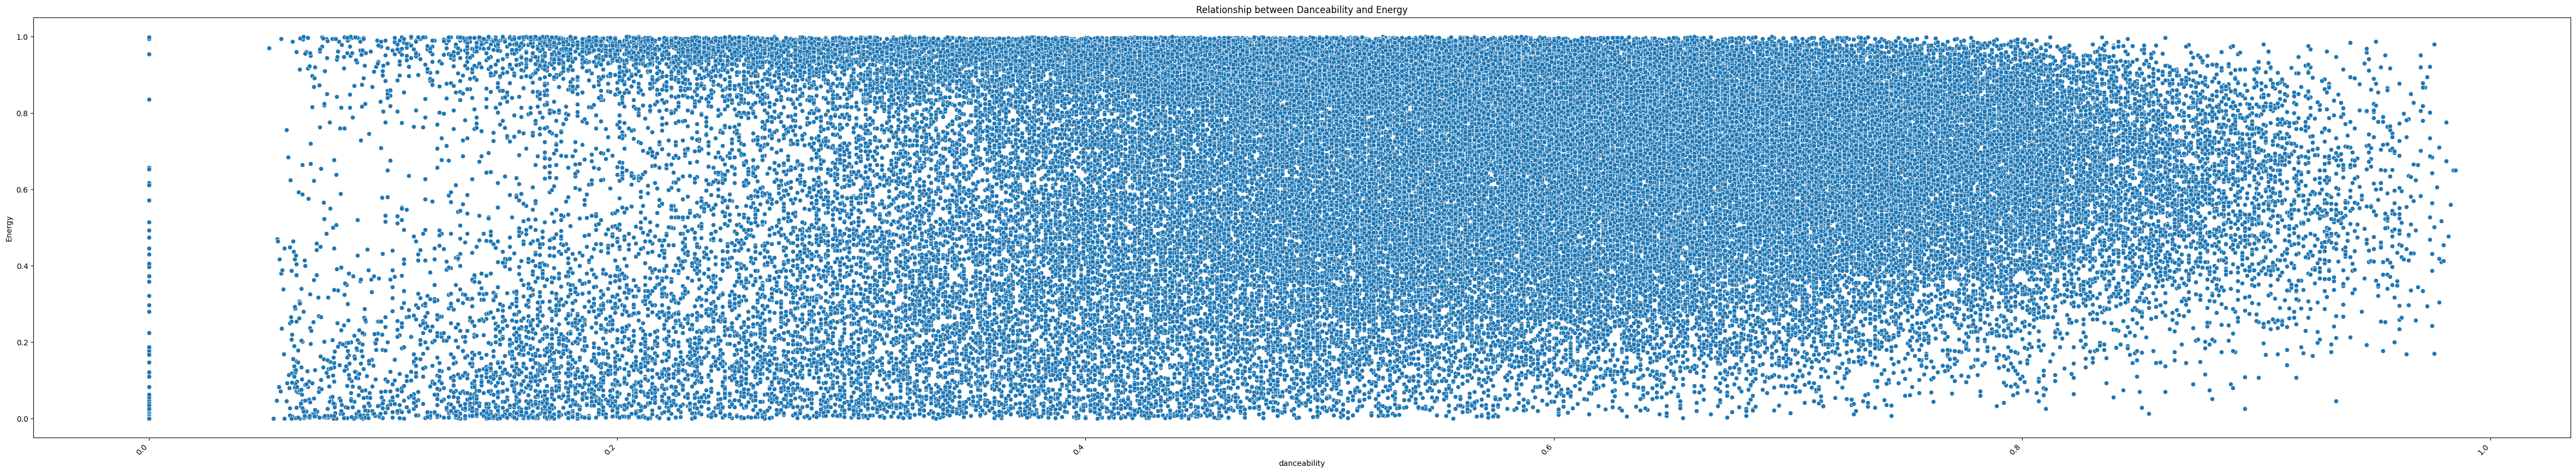

In [52]:
plt.figure(figsize=(60, 10))
sns.scatterplot(x='danceability', y='energy', data=df)  
plt.xticks(rotation=45, ha='right')
plt.title('Relationship between Danceability and Energy')
plt.ylabel('Energy')
plt.show()

Answer: We can see a mid level strong positive relationship between danceablity and energy.

## Correlation Analysis:
- Which audio features have the strongest correlation with track popularity?

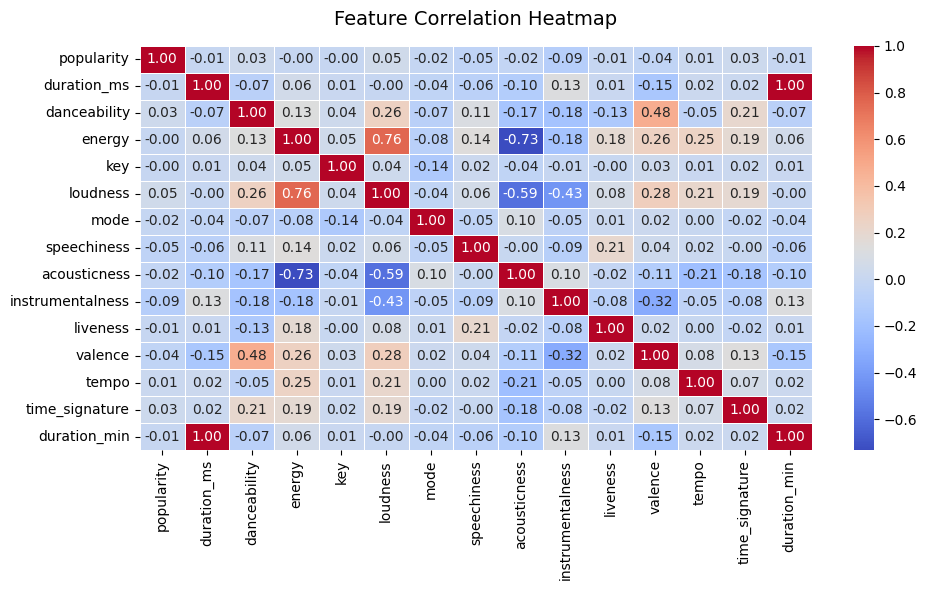

In [53]:
numerical_df = df.select_dtypes(include=np.number)
corr_matrix = numerical_df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Feature Correlation Heatmap", fontsize=14, pad=15)
plt.tight_layout()
plt.show()

In [54]:
feature  = 'popularity'
heigest_corr_feature  = corr_matrix['popularity'].sort_values(ascending=False).keys()[1]
print(f'Higest correlation of {feature} is with {heigest_corr_feature }' )


Higest correlation of popularity is with loudness


- Is there a relationship between valence (musical positivity) and energy?

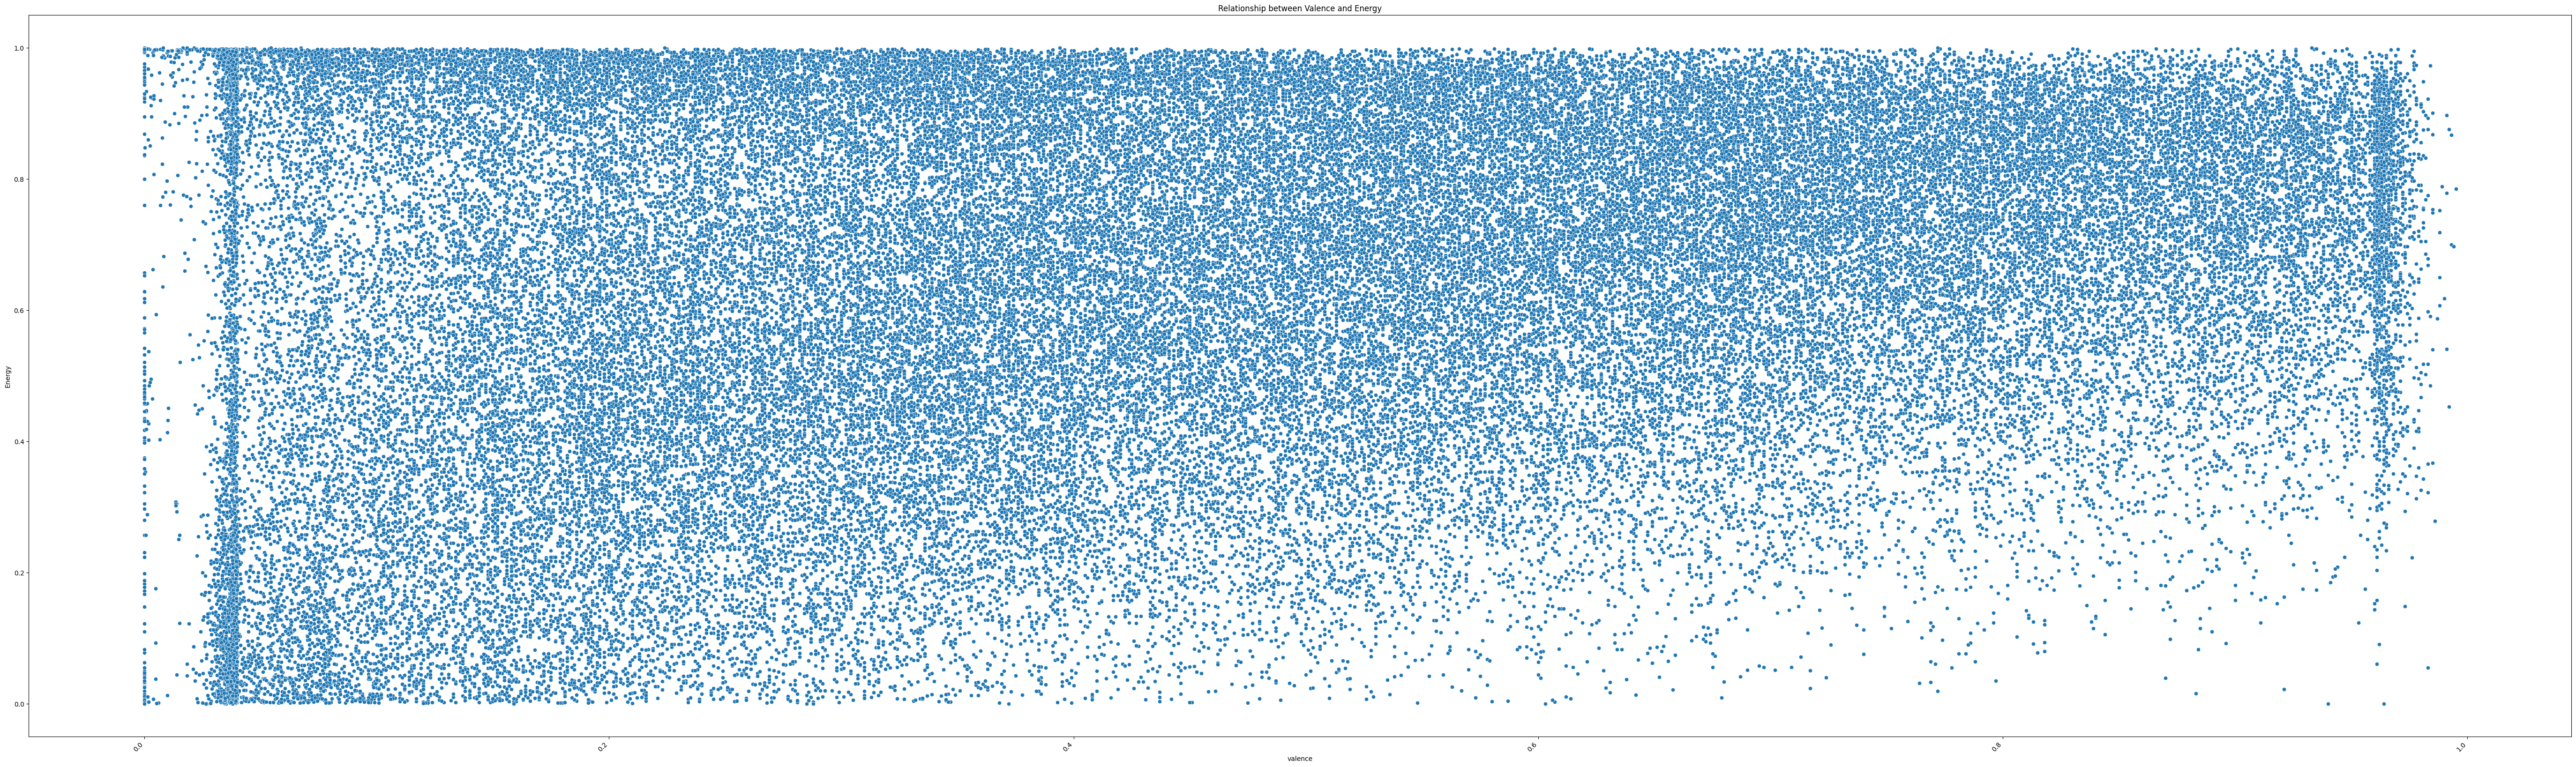

In [55]:
plt.figure(figsize=(70,20))
sns.scatterplot(x='valence', y='energy', data=df)  
plt.xticks(rotation=45, ha='right')
plt.title('Relationship between Valence and Energy')
plt.ylabel('Energy')
plt.show()

Answer: Well the data is pretty scattered but there is a certain hint of postive relation between Valanece and energy as more data is rising from left to right. But its very weak and fragile.

## Genre-Specific Analysis:


- Which genres tend to have the highest average tempo?

In [56]:
average_tempo_by_genre = df.groupby('track_genre')['tempo'].mean()
average_tempo_by_genre = average_tempo_by_genre.sort_values(ascending=False)
average_tempo_by_genre.head(10)

track_genre
drum-and-bass    155.254644
happy            152.920876
hardstyle        146.905859
forro            140.350656
j-idol           136.098086
power-pop        134.603671
dubstep          133.663397
punk             133.609122
trance           133.287026
breakbeat        133.042200
Name: tempo, dtype: float64

Answer: Genres like Drum and bass , Happy and hard stylr have high average tempo. 

- Do certain genres have consistently higher energy levels?

In [57]:
average_tempo_by_genre = df.groupby('track_genre')['energy'].mean()
average_tempo_by_genre = average_tempo_by_genre.sort_values(ascending=False)
average_tempo_by_genre.head(10)

track_genre
death-metal      0.931468
grindcore        0.924323
metalcore        0.914485
happy            0.910901
hardstyle        0.901173
drum-and-bass    0.876380
black-metal      0.874721
heavy-metal      0.874152
party            0.871349
j-idol           0.868593
Name: energy, dtype: float64

Answer: Genres like Death Metal, Grind core and metal core have high consistent higher energy levels.

- What's the distribution of explicit content across different genres?

Index(['acoustic', 'emo', 'rock-n-roll', 'reggaeton', 'disco', 'r-n-b',
       'punk-rock', 'pagode', 'electronic', 'mpb'],
      dtype='object', name='track_genre')


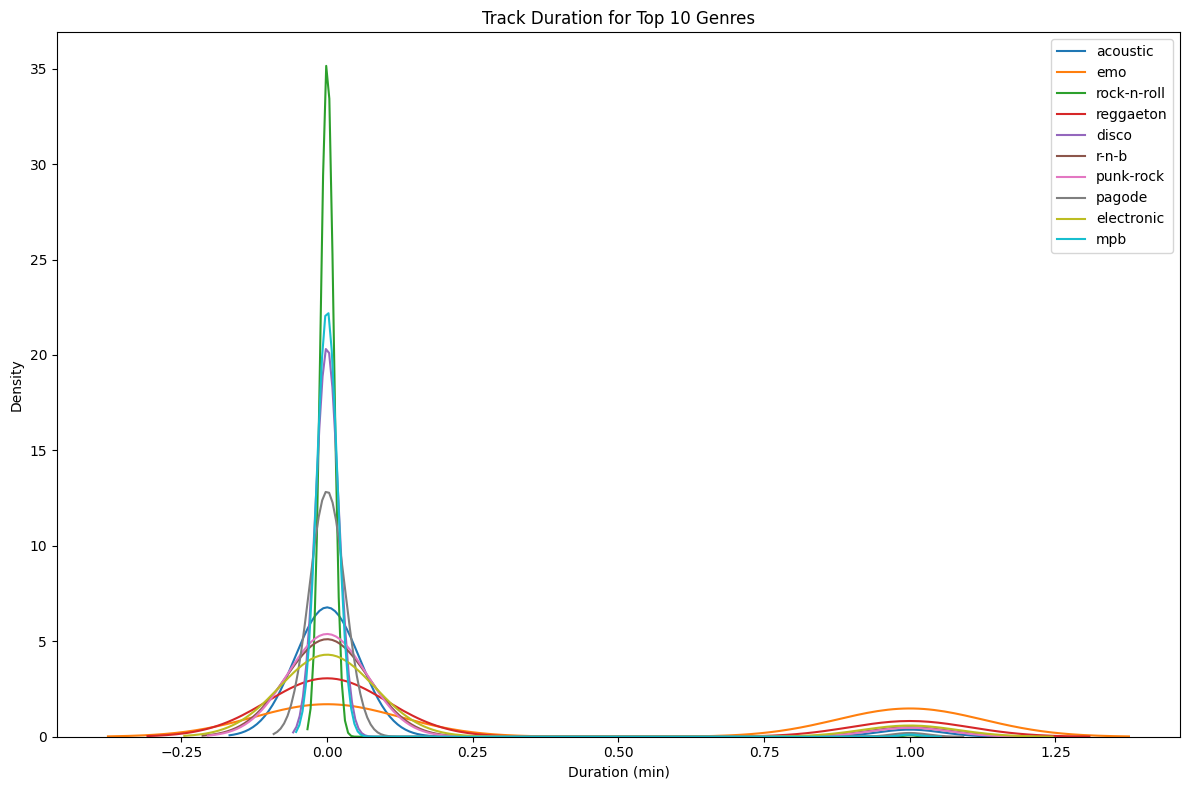

In [58]:
top_10_genres = df['track_genre'].value_counts().nlargest(10).index
print(top_10_genres)

plt.figure(figsize=(12, 8))
for genre in top_10_genres:
    sns.kdeplot(data=df[df['track_genre'] == genre]['explicit'], 
                label=genre)
plt.title('Track Duration for Top 10 Genres')
plt.xlabel('Duration (min)')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()

Answer: Most of geners dont have explicit content.

## Audio Feature Patterns:


- How does acousticness relate to instrumentalness?

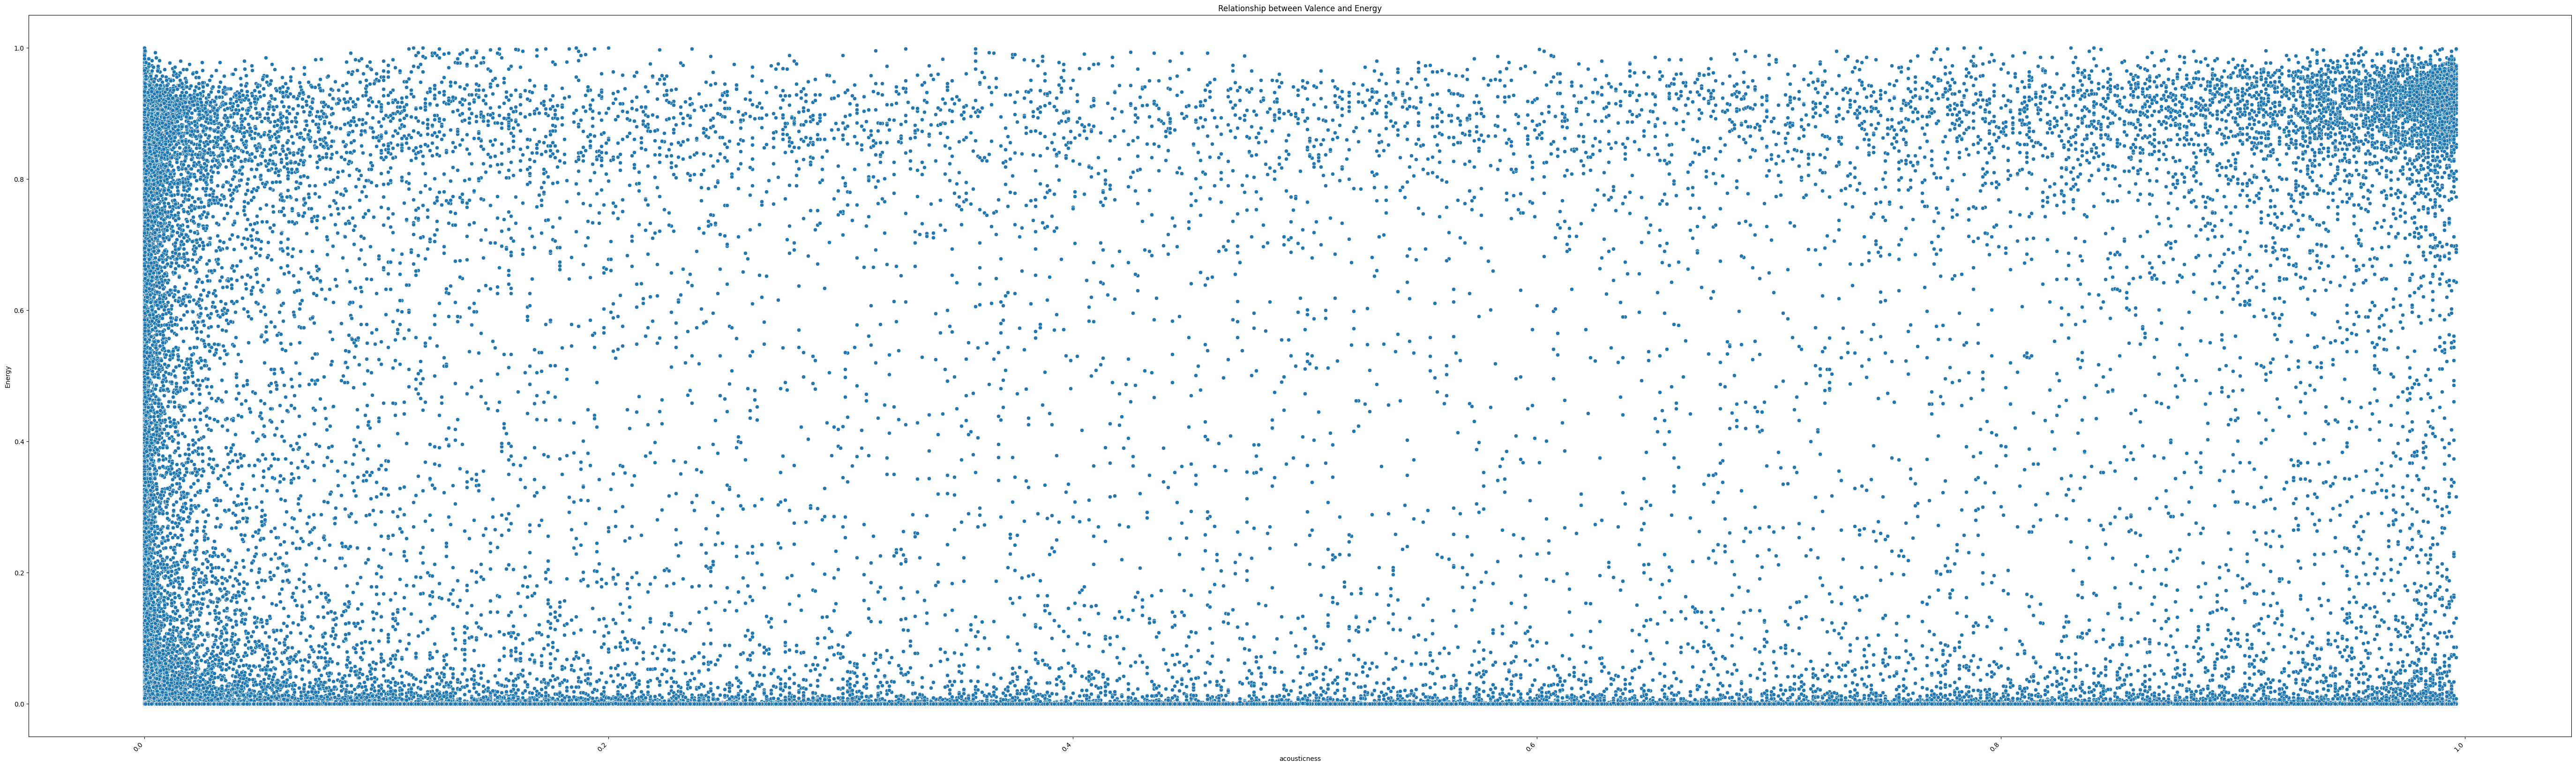

In [59]:
plt.figure(figsize=(70,20))
sns.scatterplot(x='acousticness', y='instrumentalness', data=df)  
plt.xticks(rotation=45, ha='right')
plt.title('Relationship between Valence and Energy')
plt.ylabel('Energy')
plt.show()

Answer: There is no relation clear relationaship bewtween acousticness and instrumentalness. 

- Is it possible to predict energy levels from tempo and loudness?

In [60]:
# Energy Level Prediction

X  = df[['tempo','loudness']]
y = df['energy']

onehot_Encoder = OneHotEncoder()
numeric_Encoder = StandardScaler()

preprocessor = ColumnTransformer(
    [
        ('label', onehot_Encoder, ['tempo']),
        ('numeric', numeric_Encoder, ['loudness'])
    ]
)

In [61]:
X = preprocessor.fit_transform(X)

In [62]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((90839, 45653), (22710, 45653))

In [63]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [64]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.0914
- Mean Absolute Error: 0.0534
- R2 Score: 0.8673
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.1591
- Mean Absolute Error: 0.1109
- R2 Score: 0.5995


Lasso
Model performance for Training set
- Root Mean Squared Error: 0.2510
- Mean Absolute Error: 0.2089
- R2 Score: 0.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.2514
- Mean Absolute Error: 0.2088
- R2 Score: -0.0000


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.1055
- Mean Absolute Error: 0.0788
- R2 Score: 0.8234
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.1500
- Mean Absolute Error: 0.1121
- R2 Score: 0.6439


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 0.1285
- Mean Absolute Error: 0.0931
- R2 Score: 0.7379
----------------------

In [65]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

Model Name  R2_Score
4          Decision Tree  0.655316
5           XGBRegressor  0.647589
2                  Ridge  0.643857
3  K-Neighbors Regressor  0.604134
0      Linear Regression  0.599462
6     AdaBoost Regressor  0.486916
1                  Lasso -0.000030

In [66]:
decision_tree_model = DecisionTreeRegressor()
decision_tree_model = decision_tree_model.fit(X_train, y_train)
y_pred = decision_tree_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)


 Accuracy of the model is 65.78


Text(0, 0.5, 'Predicted')

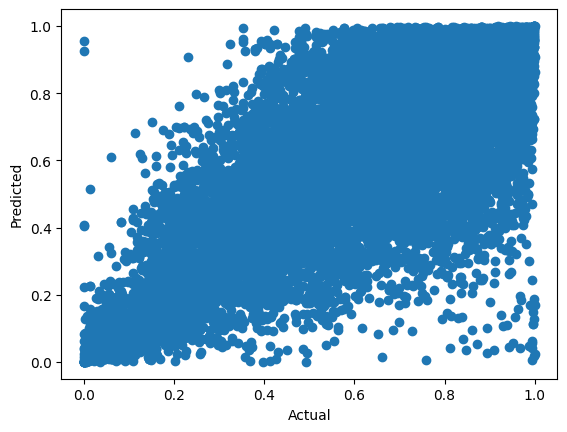

In [67]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

Answer: Due to few featues the prediction for energy levels is not very good.

- Can we estimate instrumentalness from acousticness and speechiness?

In [68]:
# instrumentalness Prediction

X  = df[['acousticness','speechiness']]
y = df['instrumentalness']

mixmax_Encoder = MinMaxScaler()

instrumentalness_preprocessor = ColumnTransformer(
    [
        ('new_encoder', mixmax_Encoder, ['acousticness','speechiness'])
    ]
)

In [69]:
X = instrumentalness_preprocessor.fit_transform(X)

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((90839, 2), (22710, 2))

In [71]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [72]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.3065
- Mean Absolute Error: 0.2325
- R2 Score: 0.0181
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.3059
- Mean Absolute Error: 0.2328
- R2 Score: 0.0194


Lasso
Model performance for Training set
- Root Mean Squared Error: 0.3093
- Mean Absolute Error: 0.2352
- R2 Score: 0.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.3090
- Mean Absolute Error: 0.2353
- R2 Score: -0.0000


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.3065
- Mean Absolute Error: 0.2325
- R2 Score: 0.0181
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.3059
- Mean Absolute Error: 0.2328
- R2 Score: 0.0194


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 0.2369
- Mean Absolute Error: 0.1435
- R2 Score: 0.4133
----------------------

In [73]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

Model Name      R2_Score
3  K-Neighbors Regressor  1.145114e-01
5     AdaBoost Regressor  8.118804e-02
2                  Ridge  1.941450e-02
0      Linear Regression  1.941412e-02
1                  Lasso -7.251671e-08
4          Decision Tree -2.088039e-01

In [74]:
lin_model = XGBRegressor()
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 19.78


Text(0, 0.5, 'Predicted')

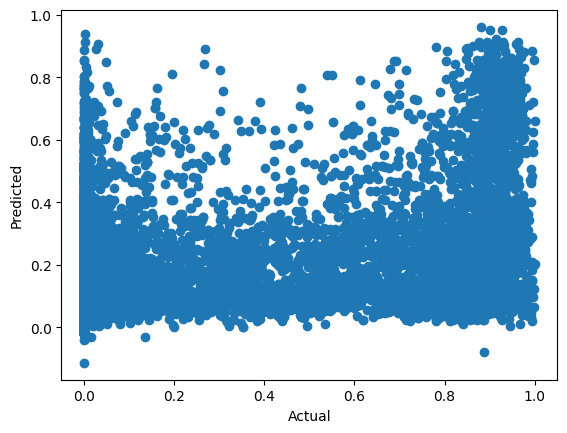

In [75]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

Answer: No can not predict the instrumentalness.

## Binary Classification Tasks:


- Can we predict whether a track is explicit based on its audio features?

In [76]:
X = df.drop(['track_id','artists','album_name','track_name','explicit','mode' ,'duration_ms'], axis=1)
y = df['explicit']
X.head()

popularity  danceability  energy  key  loudness  speechiness  acousticness  \
0          73         0.676  0.4610    1    -6.746       0.1430        0.0322   
1          55         0.420  0.1660    1   -17.235       0.0763        0.9240   
2          57         0.438  0.3590    0    -9.734       0.0557        0.2100   
3          71         0.266  0.0596    0   -18.515       0.0363        0.9050   
4          82         0.618  0.4430    2    -9.681       0.0526        0.4690   

   instrumentalness  liveness  valence    tempo  time_signature track_genre  \
0          0.000001    0.3580    0.715   87.917               4    acoustic   
1          0.000006    0.1010    0.267   77.489               4    acoustic   
2          0.000000    0.1170    0.120   76.332               4    acoustic   
3          0.000071    0.1320    0.143  181.740               3    acoustic   
4          0.000000    0.0829    0.167  119.949               4    acoustic   

   duration_min  
0      3.844433  
1      2.493500  
2      3.513767  
3      3.365550  
4      3.314217

In [77]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

In [78]:
numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [79]:
X = preprocessor.fit_transform(X)

In [80]:
y = LabelEncoder().fit_transform(y)

In [81]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((166129, 127), (41533, 127))

In [83]:
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced',max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced'),
    "Random Forest": RandomForestClassifier(class_weight='balanced',n_estimators=500, max_depth=5,random_state=42),
    "Support Vector Machine": SVC(class_weight='balanced'),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=2),
    "XGBoost": XGBClassifier(scale_pos_weight=10, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier()
}

In [84]:
def evaluate_model(true, predicted):
    f1 = f1_score(true, predicted)
    ras = roc_auc_score(true, predicted)
    aps = average_precision_score(true, predicted)
    return f1, ras, aps

In [85]:
model_list = []
f1 = []
ras = []
aps = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_f1 , model_train_ras, model_train_aps = evaluate_model(y_train, y_train_pred)

    model_test_f1 , model_test_ras, model_test_aps = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- F1 Score: {:.4f}".format(model_train_f1))
    print("- ROC-AUC-Score: {:.4f}".format(model_train_ras))
    print("- Precision Recall AUC Score: {:.4f}".format(model_train_aps))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- F1 Score: {:.4f}".format(model_test_f1))
    print("- ROC-AUC-Score: {:.4f}".format(model_test_ras))
    print("- Precision Recall AUC Score: {:.4f}".format(model_test_aps))
    f1.append(model_test_f1)
    ras.append(model_test_ras)
    aps.append(model_test_aps)
    
    print('='*35)
    print('\n')

Logistic Regression
Model performance for Training set
- F1 Score: 0.8109
- ROC-AUC-Score: 0.8052
- Precision Recall AUC Score: 0.7400
----------------------------------
Model performance for Test set
- F1 Score: 0.8120
- ROC-AUC-Score: 0.8053
- Precision Recall AUC Score: 0.7411


Decision Tree
Model performance for Training set
- F1 Score: 1.0000
- ROC-AUC-Score: 1.0000
- Precision Recall AUC Score: 1.0000
----------------------------------
Model performance for Test set
- F1 Score: 0.9268
- ROC-AUC-Score: 0.9255
- Precision Recall AUC Score: 0.8889


Random Forest
Model performance for Training set
- F1 Score: 0.7872
- ROC-AUC-Score: 0.7751
- Precision Recall AUC Score: 0.7051
----------------------------------
Model performance for Test set
- F1 Score: 0.7877
- ROC-AUC-Score: 0.7741
- Precision Recall AUC Score: 0.7051


Support Vector Machine
Model performance for Training set
- F1 Score: 0.8925
- ROC-AUC-Score: 0.8881
- Precision Recall AUC Score: 0.8329
-------------------------

In [86]:
pd.DataFrame(list(zip(model_list, f1)), columns=['Model Name', 'F1 score']).sort_values(by=["F1 score"],ascending=False)

Model Name  F1 score
4     K-Nearest Neighbors  0.963207
1           Decision Tree  0.926804
3  Support Vector Machine  0.886905
5                 XGBoost  0.855788
6       Gradient Boosting  0.836882
0     Logistic Regression  0.812029
2           Random Forest  0.787672

In [87]:
pd.DataFrame(list(zip(model_list, aps)), columns=['Model Name', 'Precision Recall AUC Score']).sort_values(by=["Precision Recall AUC Score"],ascending=False)

Model Name  Precision Recall AUC Score
4     K-Nearest Neighbors                    0.930075
1           Decision Tree                    0.888888
3  Support Vector Machine                    0.825315
6       Gradient Boosting                    0.770778
5                 XGBoost                    0.750311
0     Logistic Regression                    0.741086
2           Random Forest                    0.705074

In [88]:
pd.DataFrame(list(zip(model_list, ras)), columns=['Model Name', 'ROC-AUC-Score']).sort_values(by=["ROC-AUC-Score"],ascending=False)

Model Name  ROC-AUC-Score
4     K-Nearest Neighbors       0.961692
1           Decision Tree       0.925464
3  Support Vector Machine       0.881541
5                 XGBoost       0.831865
6       Gradient Boosting       0.831718
0     Logistic Regression       0.805318
2           Random Forest       0.774086

In [92]:
final_model = KNeighborsClassifier(n_neighbors=2)
final_model = final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)
score = f1_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)


 Accuracy of the model is 96.32


In [98]:
from sklearn import set_config
set_config(display='diagram')
preprocessor


ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(),
                                 Index(['track_genre'], dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['popularity', 'danceability', 'energy', 'key', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'duration_min'],
      dtype='object'))])

In [96]:
class_counts = np.bincount(y_resampled)
print(class_counts)

[103831 103831]


Answer: Yes you can predict weather a track is explict or not based on its audio features. As in this experiment KNeighborsClassifier with 2 clusters range can predict upto 96%. The evaluation metric used for this was f1_score. 
Data set was higly imbalanced as 90% instances belong to one class. There SMOTE was use t balance the class and also some class balancing parameter were used in different algorithms. To run all the algorithms it took more than 30 mins but after training test accuracy was worth all the wait.